In [106]:
import json
import os
import urllib.request
import csv
import pandas as pd

# Task 1: Identify one or more suitable web APIs

I have chosen The Movie DB (TMDB) API.

Original link of the API: https://developers.themoviedb.org/3

The API key for The Movie DB (TMDB) is 270c2cfbc356a9a9342f844d62f345c0

API request : 
link = https://api.themoviedb.org/3/movie/550?api_key=270c2cfbc356a9a9342f844d62f345c0

# Task 2: Collect data of your chosen API(s) 

In [107]:
jsonfile = 'Json_File_write1.json'

with open(jsonfile, "w") as write_file: # Writing to json
    for movie_id in range(100,119):
        link = "https://api.themoviedb.org/3/movie/" + str(movie_id) + "?api_key=270c2cfbc356a9a9342f844d62f345c0"
        response = urllib.request.urlopen(link)
        raw_json = response.read().decode("utf-8")
        data_new = json.loads(raw_json )# jsonloads converts to python object
        json.dump(data_new,write_file,indent = 2,sort_keys=True)# gives clean and indented data
write_file.close()

# print(data_new)

with open('Json_File_write1.json', 'r') as f: # reading to json
    data = f.read()
    new_data = data.replace("}{", "},{")
    json_data = json.loads(f'[{new_data}]')
    #print(json_data)

We have written the available movie API data to a Json file.Also,we have retrieved data and have stored it in JSON format.Our collected data is in "Json_File_write1.json" file.

# Task 3: Parse the collected data, and store it in an appropriate file format

The following code retreives the raw data using the API and writes it to a CSV file.

In [108]:
#Converting json_data to csv format for data analysis

csvfile=open('final_details.csv','w', newline='')
fields=list(json_data[0].keys())
obj=csv.DictWriter(csvfile, fieldnames=fields)
obj.writeheader()
obj.writerows(json_data)
csvfile.close()

# Task 4: Load and represent the data using an appropriate data structure. Apply any pre-processing steps to clean/filter/combine the data

In [109]:
# Coverting the dataset ito dataframe
import pandas as pd
df = pd.read_csv("final_details.csv")
#print(df)
df.shape

(19, 25)

 # Data Cleaning:
 Data requires extensive cleaning,so we will be removing all the uncessary data through our code.
 We also dropped nan or null values from columns.
 We remove columns backdrop_path,homepage and poster_path as these data are not neccesary for our Data Analaysis.

In [110]:
df.drop(labels=['backdrop_path'],axis=1,inplace=True) #removed backdrop_path column as not necessary

In [111]:
df.drop(labels=['homepage'],axis=1,inplace=True)#removed homepage column as not necessary

In [112]:
df.drop(labels=['poster_path'],axis=1,inplace=True)#removed poster path column as not necessary

In [113]:
df.dropna(axis=1,inplace=True) #dropped nan or null values from columns 

In [114]:
df #cleaned data

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,1350000,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",100,tt0120735,en,"Lock, Stock and Two Smoking Barrels",A card shark and his unwillingly-enlisted frie...,10.104,"[{'id': 491, 'logo_path': '/rUp0lLKa1pr4UsPm8f...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1998-03-05,28356188,105,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"Lock, Stock and Two Smoking Barrels",False,8.2,4693
1,False,16000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",101,tt0110413,en,Léon: The Professional,"Léon, the top hit man in New York, has earned ...",46.525,"[{'id': 9, 'logo_path': '/nda3dTUYdDrJ6rZqBpYv...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1994-09-14,45284974,111,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Léon: The Professional,False,8.3,10658
2,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",102,tt0315543,da,Elsker dig for evigt,Cecilie and Joachim are about to get married w...,5.264,"[{'id': 76, 'logo_path': None, 'name': 'Zentro...","[{'iso_3166_1': 'DK', 'name': 'Denmark'}]",2002-09-06,0,113,"[{'english_name': 'Danish', 'iso_639_1': 'da',...",Released,Open Hearts,False,7.1,60
3,False,1300000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",103,tt0075314,en,Taxi Driver,A mentally unstable Vietnam War veteran works ...,31.831,"[{'id': 46059, 'logo_path': None, 'name': 'Ita...","[{'iso_3166_1': 'US', 'name': 'United States o...",1976-02-09,28262574,114,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Taxi Driver,False,8.2,7940
4,False,1530000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",104,tt0130827,de,Lola rennt,Lola receives a phone call from her boyfriend ...,12.209,"[{'id': 96, 'logo_path': '/9ps82gVzUeNdkjmLzoG...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",1998-03-03,7267585,81,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,Run Lola Run,False,7.3,1478
5,False,19000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",105,tt0088763,en,Back to the Future,Eighties teenager Marty McFly is accidentally ...,43.598,"[{'id': 33, 'logo_path': '/8lvHyhjr8oUKOOy2dKX...","[{'iso_3166_1': 'US', 'name': 'United States o...",1985-07-03,381109762,116,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Back to the Future,False,8.3,14749
6,False,15000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",106,tt0093773,en,Predator,Dutch and his group of commandos are hired by ...,53.293,"[{'id': 342, 'logo_path': None, 'name': 'Davis...","[{'iso_3166_1': 'US', 'name': 'United States o...",1987-06-12,98267558,107,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Predator,False,7.5,5292
7,False,10000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",107,tt0208092,en,Snatch,Illegal boxing promoter Turkish convinces gang...,28.227,"[{'id': 3287, 'logo_path': '/bz6GbCQQXGNE56LTW...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2000-09-01,83557872,104,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Snatch,False,7.8,6494
8,False,0,"[{'id': 18, 'name': 'Drama'}]",108,tt0108394,fr,Trois couleurs : Bleu,Julie is haunted by her grief after living thr...,14.485,"[{'id': 591, 'logo_path': '/q5I5RDwMEiqoNmfaJg...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1993-09-08,0,98,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,Three Colors: Blue,False,7.7,1030
9,False,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",109,tt0111507,fr,Trois couleurs : Blanc,Polish immigrant Karol Karol finds himself out...,12.381,"[{'id': 183, 'logo_path': None, 'name': 'Le St...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1994-01-26,0,92,"[{'english_name': 'Polish', 'iso_639_1': 'pl',...",Released,Three Colors: White,False,7.5,701


In [115]:
new_df = df.rename(columns={'id':'movie_id'}) #renaming id to movie_id for cleaner dataset

In [116]:
new_df = new_df.sort_values(by=['release_date'])# sorting by release date

In [121]:
# print(new_df)
list(new_df.columns)

['adult',
 'budget',
 'genres',
 'movie_id',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'title',
 'video',
 'vote_average',
 'vote_count']

# Task 5: Analyse and summarise the cleaned dataset

In [122]:
# Descriptive Statistics
new_df['popularity'].describe()

count    19.000000
mean     29.842684
std      22.680258
min       5.264000
25%      12.980500
50%      21.766000
75%      45.061500
max      82.558000
Name: popularity, dtype: float64

In [123]:
new_df['runtime'].describe()

count     19.000000
mean     110.684211
std       18.009419
min       81.000000
25%      101.500000
50%      111.000000
75%      116.500000
max      170.000000
Name: runtime, dtype: float64

 We can see that average runtime of all the movies listed in our dataset is 110.68 minutes.

# Matplotlib Graphing

In [124]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

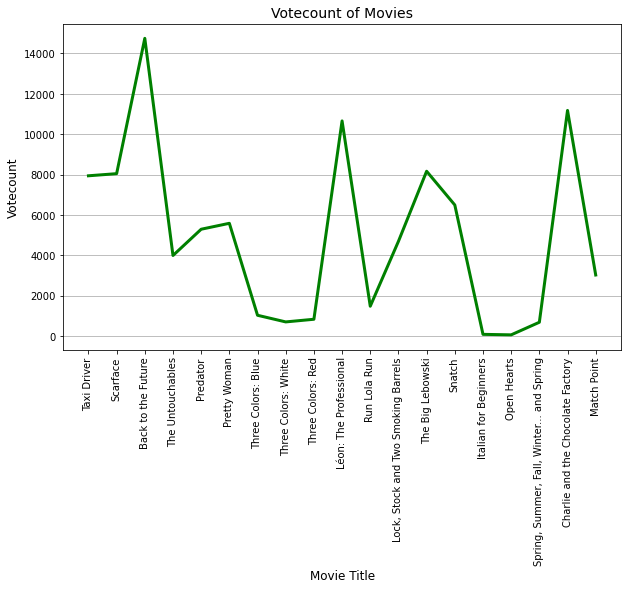

In [99]:
plt.figure(figsize=(10,6))
p = plt.plot(new_df['title'],new_df['vote_count'], color="green", linewidth=3)
plt.title('Votecount of Movies', fontsize=14)
plt.grid(axis="y")
plt.xticks(rotation=90)
plt.xlabel('Movie Title', fontsize= 12)
plt.ylabel('Votecount', fontsize=12)
plt.show()

Here, we have plotted the graph indicating votecounts of each movie of our dataset.As a result, we can see that movie titled "Back to the Future" has the highest votecount.

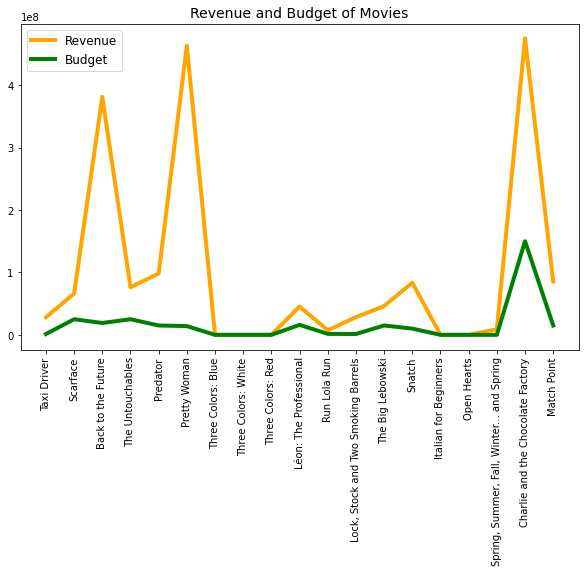

In [125]:
plt.figure(figsize=(10,6))
p = plt.plot(new_df['title'],new_df['revenue'], color="orange", linewidth=4)
p = plt.plot(new_df['title'],new_df['budget'], color="green", linewidth=4)
plt.title('Revenue and Budget of Movies', fontsize=14)
# plt.grid(axis="y")
plt.xticks(rotation=90)
plt.legend(["Revenue","Budget"], fontsize=12)
plt.show()

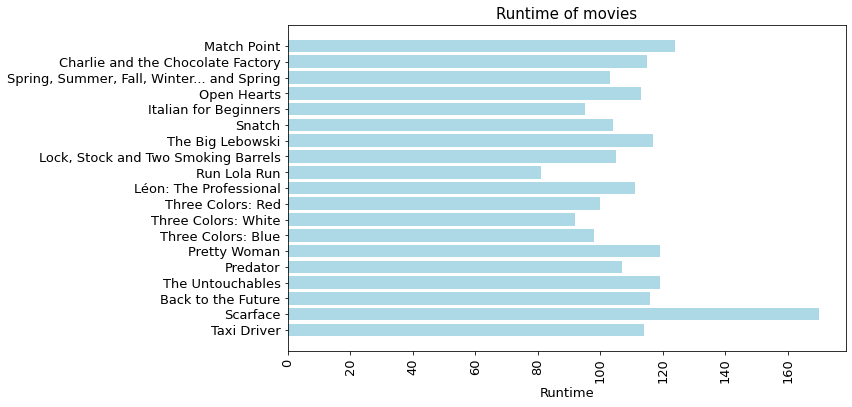

In [126]:
plt.figure(figsize=(10,6))
x=new_df['title']
y=new_df['runtime']
plt.barh(x,y,align="center",color="lightblue")
plt.title("Runtime of movies", fontsize=15)
plt.xlabel("Runtime", fontsize=13)
plt.xticks(fontsize=13)
plt.xticks(rotation=90)
plt.yticks(fontsize=13);

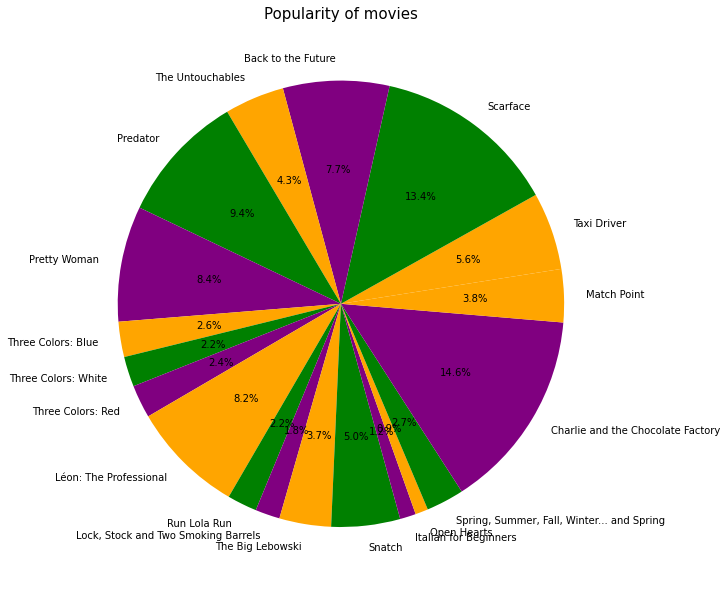

In [102]:
plt.figure(figsize=(10,18))
x=new_df['title']
y=new_df['popularity']
# colors=["lightblue","coral","green","blueviolet"]
p = plt.pie(y, labels=x,colors=["orange","green","purple"], 
            autopct="%.1f%%", shadow=False, startangle=9)
plt.title("Popularity of movies",fontsize=15)
plt.savefig("final-pie-chart.png")

We can say the "Charlie and the Choclate Factory" was most popular movie in the era.

# Final Manipulation, Exploration ,Visualisation and Tentative Conclusion

In [127]:
new_df['release_date'].value_counts() # showing number of movies in that particular year and date.

2005-10-26    1
1998-03-06    1
1998-03-05    1
2003-09-19    1
1993-09-08    1
1994-05-27    1
1987-06-12    1
2002-09-06    1
2000-09-01    1
1990-03-23    1
2005-07-13    1
1985-07-03    1
1987-06-03    1
1994-01-26    1
1998-03-03    1
1983-12-09    1
2000-12-07    1
1994-09-14    1
1976-02-09    1
Name: release_date, dtype: int64

In [128]:
# Grouping the data frame by release date and title and extracting a number of stats from each group

new_df.groupby(
   ['release_date','title']
).agg(
    {
         'revenue': sum,
         'vote_count':sum,    # Sum duration per group
         'popularity': sum  # get the first date per group
     }
)

,,revenue,vote_count,popularity
release_date,title,,,
1976-02-09,Taxi Driver,28262574,7940,31.831
1983-12-09,Scarface,66023329,8045,75.897
1985-07-03,Back to the Future,381109762,14749,43.598
1987-06-03,The Untouchables,76270454,3991,24.518
1987-06-12,Predator,98267558,5292,53.293
1990-03-23,Pretty Woman,463000000,5586,47.457
1993-09-08,Three Colors: Blue,0,1030,14.485
1994-01-26,Three Colors: White,0,701,12.381
1994-05-27,Three Colors: Red,0,832,13.580


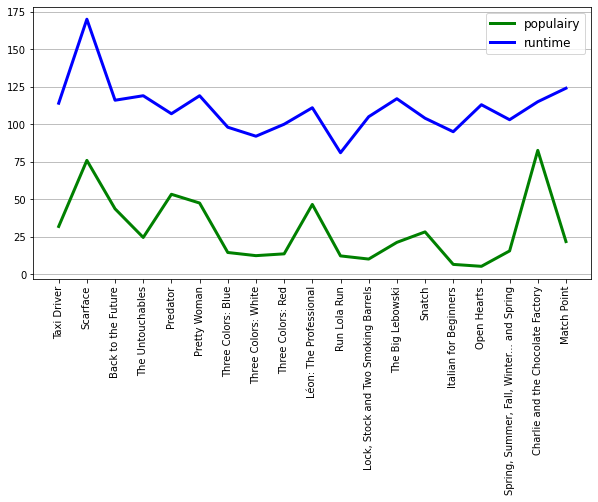

In [105]:
plt.figure(figsize=(10,5))
p = plt.plot(new_df['title'],new_df['popularity'], color="green", linewidth=3)
p = plt.plot(new_df['title'],new_df['runtime'], color="blue", linewidth=3)
plt.grid(axis="y")
plt.xticks(rotation=90)
plt.legend(["populairy","runtime"], fontsize=12)
plt.show();

Here,we can analsye that movie titled "Scarface" has the highest runtime and the movie "Charlie and the choclate factory" has highest popularity count.So, we can conclude that popularity does not depend on how long the movie is instead depends on the content.